## Utilisation du module de Scraping

In [1]:
import openfoodfacts

In [8]:
openfoodfacts.scrap_openfoodfacts(nb_pages = 180)

Temps d'éxecution : --- 5497.646071434021 seconds ---
Merci pour votre patience !


Le module s'importe correctement.

La fonction s'execute sans erreurs. Comme précisé dans la documentation, on peut spécifier le nombre de pages à scraper sur le site d'Open Food Facts. Il faut en moyenne 30 secondes pour scraper une page du site web.

## Chargement des données

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('openfoodfacts.csv')

In [11]:
df.head()

,Produit,CodeBarre,NutriScore,Nova,Caractéristiques,Ingrédients,NoPalme,Palme,KJ,KCAL,...,Code,Lien,Magasin,Origine,Pays,NbPays,MatGrasse,AcideGras,Sucre,Sel
0,"Cristaline Eau de source - 1,5",3.274080e+12,A,1.0,Eau de source naturelle,Eau minérale naturelle,Sans huile de palme,NaN,0.0,0.0,...,"EMB 44068A - Guenrouet (Loire-Atlantique, Fra...",//www.moneaucristaline.fr/,"Carrefour, Leclerc, Auchan",France,"[' France', ' Guadeloupe', ' Italie', ' Luxemb...",12,4.0,0.0,0.0,0.0275
1,Nutella - Ferrero - 400,3.017620e+12,E,4.0,Pâte à tartiner aux noisettes et au cacao,"Sucre, huile de palme, noisettes 13%, lait écr...",NaN,Huile de palme,25.0,539.0,...,NON COMMUNIQUÉ,//www.nutella.com/fr/fr/produits/n...,"Bi1, Magasins U, Carrefour, Franprix, Auchan","Australie, Brésil, Chili, Côte d'Ivoire, Ghan...","[' Autriche', ' Belgique', ' Canada', ' France...",17,30.9,10.6,56.3,0.1070
2,Prince - Lu - 300,7.622210e+12,D,4.0,BISCUITS FOURRÉS (35%) PARFUM CHOCOLAT,"céréales 50,7% (farine de blé 35%, farine de b...",NaN,NaN,95.0,465.0,...,NaN,//www.lu.fr/prince,"Carrefour Market, Magasins U, Auchan, Interma...",NaN,"[' Belgique', ' France', ' Polynésie française...",15,17.0,5.6,32.0,0.5800
3,Coca-Cola - 330,5.449000e+12,E,4.0,Soda aux extraits végétaux,"Eau gazéifiée, sucre, colorant : E150d, acidif...",NaN,NaN,180.0,42.0,...,NaN,//coca-cola.pl coke.at,"Tesco, Auchan, Carrefour",NaN,"[' Andorre', ' Autriche', ' Belgique', ' Brési...",36,0.0,0.0,10.6,0.0000
4,Nutella - Ferrero - 1,3.017620e+12,E,4.0,Pâte à tartiner aux noisettes,"Sucre, huile de palme, NOISETTES 13%, LAIT écr...",NaN,Huile de palme,25.0,539.0,...,NaN,//www.nutella.com/fr/fr/produits/n...,Auchan,NaN,"[' Belgique', ' France', ' Allemagne', ' Guade...",10,30.9,10.6,56.3,0.1070


In [32]:
df.shape

(18000, 27)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Produit           18000 non-null  object 
 1   CodeBarre         17926 non-null  float64
 2   NutriScore        16254 non-null  object 
 3   Nova              16349 non-null  float64
 4   Caractéristiques  10355 non-null  object 
 5   Ingrédients       17004 non-null  object 
 6   NoPalme           9299 non-null   object 
 7   Palme             1089 non-null   object 
 8   KJ                7229 non-null   float64
 9   KCAL              16282 non-null  float64
 10  Eco-Score         14089 non-null  object 
 11  Quantité          16933 non-null  object 
 12  Conditionnement   16104 non-null  object 
 13  Marque            17765 non-null  object 
 14  Catégorie         18000 non-null  object 
 15  Label             9901 non-null   object 
 16  Lieux             7828 non-null   object

Le dataset a correctement été généré. Il contient 18 000 éléments pour 26 variables différentes.

Afin de faciliter l'analyse, les données manquantes ont été notifié comme "NaN" et non comme "XXX". Cela permet de visualiser rapidement les variables qui ont été plus dures à scraper, comme le lien du produit par exemple.

## Analyse de données

### Distribution du nombre de produits par catégorie NutriScore, Eco-Score et NovaScore

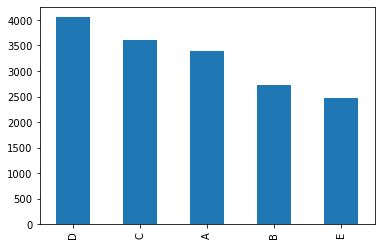

In [14]:
df.NutriScore.value_counts().plot(kind = 'bar')
plt.show()

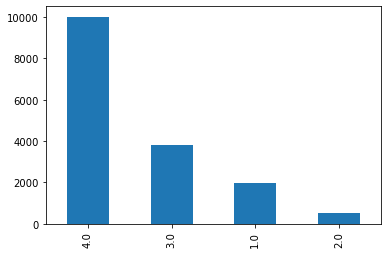

In [15]:
df.Nova.value_counts().plot(kind = 'bar')
plt.show()

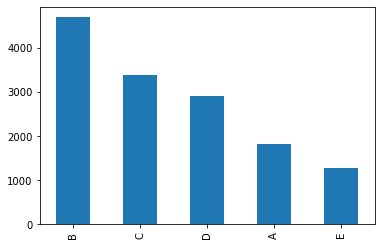

In [16]:
df['Eco-Score'].value_counts().plot(kind = 'bar')
plt.show()

Comme on peut l'apercevoir ci-dessus, la majorité des produits partagent les caractéristiques suivantes :

Nutri Score : D, Eco-Score : B, Nova Score : 4.

Autrement dit, la plupart des produits sont ultra-transformés et de mauvaise qualité nutritionnelle. Cependant, Ils n'ont globalement pas un impact environnemental trop élevé (Bien que les scores C et D se retrouvent en 2ème et 3ème position). 

La distribution du Nutri Score est plutôt équilibré, ce qui signifie qu'avec un peu de recherche on peut trouver des substituts de meilleure qualité pour un même produit.

Ce n'est cependant pas le cas du Nova Score, il sera toujours difficile de trouver des aliments ayant été peu transformés. C'est donc principalement ce score que l'on souhaiterait améliorer dans une problématique business.

### Liste des produits "Gluten Free" optimaux

In [5]:
df[(df['NutriScore'] == 'A') & (df['Eco-Score'] == 'A') & (df['Nova'] == 1)][['Produit', 'NutriScore', 'Eco-Score', 'Nova']]

,Produit,NutriScore,Eco-Score,Nova
387,Panzani tomacouli nature - 200,A,A,1.0
389,Soja nature sans sucre ajouté bio - Bjorg - 1,A,A,1.0
549,Compote Pomme Nature - Andros - 730,A,A,1.0
1064,Pomme Sans sucres ajoutés - Carrefour - 710,A,A,1.0
1074,Panzani - bc - tomacouli nature bio - 250,A,A,1.0
...,...,...,...,...
17351,Ananas origine Philippines en tranches au jus ...,A,A,1.0
17583,Tomates entières pelées fraîches - Carrefour B...,A,A,1.0
17611,Lentille verte du Centre - Reflets de France -...,A,A,1.0
17884,Farine de blé Bio - Auchan - 1,A,A,1.0


Après analyse, on se retrouve avec 173 produits "Gluten Free" optimaux. Autrement dit, il y a une proportion d'environ 1% de produits "Gluten Free" optimaux au sein de notre dataset. Il n'est donc pas impossible de s'alimenter en choisissant des produits de qualité mais cela reste une tâche difficile à accomplir. En effet, il est rare qu'un produit possède les 3 scores de qualité au maximum. Une alternative peut alors être de se contenter des produits n'ayant que 2 des 3 scores optimaux.

In [8]:
df[(df['NutriScore'] == 'A') & (df['Eco-Score'] == 'A')].count()['Produit']

697

In [9]:
df[(df['NutriScore'] == 'A') & (df['Nova'] == 1)].count()['Produit']

963

In [10]:
df[(df['Eco-Score'] == 'A') & (df['Nova'] == 1)].count()['Produit']

251

Comme on peut le voir dans les exemples ci-dessus, cela augmente nettement la quantité de produits disponibles. Il peut ainsi s'agir d'un compromis intéressant pour élargir sa gamme de produits sans pour autant baisser trop leur qualité.

### Nombre de produit dont le ratio sucre/produit est supérieur à 0.6

In [12]:
nb_sucre = df[df['Sucre']/100 >= 0.6].count()['Produit']
nb_sucre

373

In [13]:
ratio_sucre = nb_sucre / len(df) 
ratio_sucre
y = np.array([1-ratio_sucre, ratio_sucre])
labels = ['Sucre/Produit < 0.6', 'Sucre/Produit > 0.6']

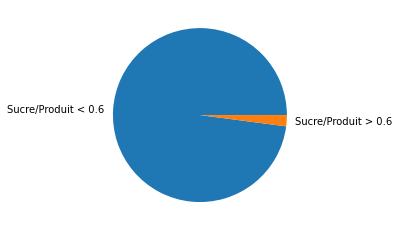

In [20]:
plt.pie(y, labels = labels)
plt.show()

In [14]:
ratio_sucre

0.020722222222222222

373 produits de notre dataset ont un ratio sucre/produit supérieur à 0.6. Cela représente environ 2% de nos données. Il s'agit ainsi de produits relativement rares. 

In [19]:
nb_sucre = df[df['Sucre']/100 >= 0.5].count()['Produit']
nb_sucre

1024

Cependant, ce ratio augmente rapidement. En effet, 1024 produits ont un ratio sucre/produit supérieur à 0.5. Il faut donc rester vigilent sur la quantité de sucre présent dans nos aliments.

### Liste des produits dont le nombre de calories pour 100g est supérieur à 500

In [21]:
df[df['KCAL'] > 500]['Produit']

1                                  Nutella - Ferrero - 400
4                                   Nutella - Ferrero - 1 
7                         Nutella biscuits - Ferrero - 304
15       Excellence 70% Cacao Noir Intense - Lindt - 100 g
27              Pur beurre de cacahuète - Jardin Bio - 350
                               ...                        
17947           Pistaches caramélisées - J. D. GROSS - 125
17953    Big Hit Cacahuètes Chocolatées - Mister ChocLi...
17963              Chocolat noir - Château - 400 g (2x200 
17967                  Palmiers - Mes p tits secrets - 100
17976                           Mayonnaise - Lesieur - 710
Name: Produit, Length: 2190, dtype: object

2190 produits possèdent plus de 500 calories pour 100g (soit 12% de nos données). Encore une fois, il faut rester vigilent face à ce genre d'indicateur qui montre que notre alimentation est souvent trop riche en calories.

### Liste des produits contenant de l’huile de palme, vendu en France et en Belgique

In [20]:
palme = df[(df['Palme'] == 'Huile de palme') & ((df['Pays'].str.contains('France')) & (df['Pays'].str.contains('Belgique')))]['Produit']

In [21]:
palme

1                                  Nutella - Ferrero - 400
4                                   Nutella - Ferrero - 1 
7                         Nutella biscuits - Ferrero - 304
29                                 Nutella - Ferrero - 975
35                                 Nutella - Ferrero - 750
50                                 Nutella - Ferrero - 825
127      Kinder bueno gaufrettes enrobees de chocolat 2...
256      Nutella pate a tartiner noisettes-cacao t200 p...
727      Ferrero rocher fines gaufrettes enrobees de ch...
1264                     Kinder schokobons sachet de - 200
1478     Kinder chocofresh gouter frais chocolat superi...
2396     Snickers glacé x7 - Mars - 288 g (6 * 48 g e) ...
3223                                          Maltesers 17
3599     Bounty Barres Glacees Ice Cream - BountyMars -...
3887         Ristorante - Pizza Spinaci - Dr. Oetker - 390
3891     CLUSTERS almonds seeds barres de céréales - Ne...
7111                   Balisto Goût fruits des bois - 16

In [22]:
len(palme)

24

Voici la liste des 24 produits contenant de l'huile de palme vendu en France et Belgique. Il s'agit principalement de biscuits chocolatés ou de pates à tartiner aux noisettes.

### Distribution des produits par nombre de pays de vente

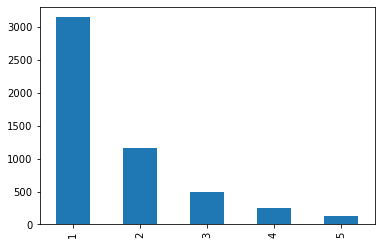

In [29]:
df['NbPays'].value_counts()[1:].nlargest(5).plot(kind='bar')
plt.show()

Comme on peut le constater, la plupart des produits sont vendus dans un unique pays. Cela peut par exemple signifier que la plupart des produits sont des aliments produits au sein du pays d'origine. Cela est plutôt encourageant dans un objectif d'une alimentation locale.

In [41]:
df[df['Produit'] == 'Coca-Cola - 330\xa0'][['Produit', 'NbPays']]

,Produit,NbPays
3,Coca-Cola - 330,36


A titre d'exemple inverse : le Coca-Cola, connu partout dans le monde, est vendu dans plus de 36 pays différents.

## Analyse complémentaire

### Quelles sont les caractéristiques des produits salés ?

L'excès de sel a un lien bien établi avec les maladies cardiovasculaires, et il est pointé du doigt dans bien d'autres pathologies. Or, le problème ne vient pas tant de la salière, que du sel caché dans les aliments industriels.

Notre analyse complémentaire portera ainsi sur ces produits. Qui sont-ils ? D'où proviennent-ils ? De quoi sont-ils composés ? Quel est leur score (Nutri/Eco/Nova) ? 

### Les produits les plus salés

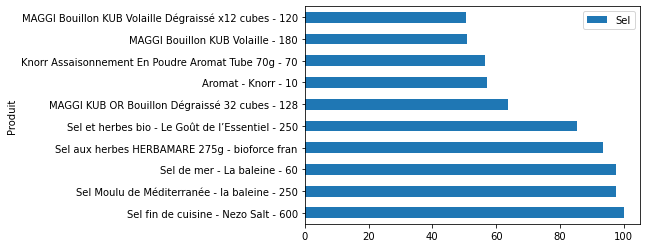

In [42]:
top_sel = df[['Produit', 'Sel']].sort_values('Sel', ascending = False).head(10)
top_sel.plot('Produit', 'Sel', kind='barh')
plt.show()

Les produits les plus salés sont principalement des produits d'assaisonnement. On peut donc garder en tête que ces produits sont à utiliser avec précaution afin de ne pas surcharger son alimentation de sel.

### D'où viennent les produits salés

In [47]:
top_sel = df[['Produit', 'Sel','Origine']].sort_values('Sel', ascending = False).head(1000)

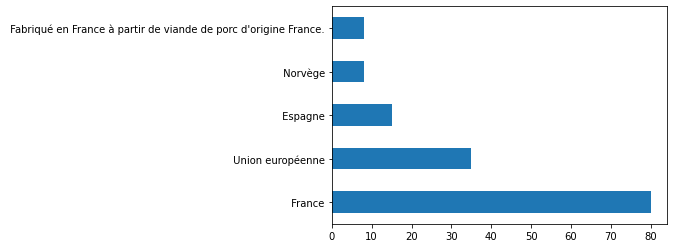

In [48]:
top_sel['Origine'].value_counts().nlargest().plot(kind='barh')
plt.show()

Comme on peut le remarquer, les aliments les plus salés proviennent essentiellement de France et de l'Union Européenne. Il peut cepandant s'agit d'un biais dans les données. En effet, il est possible que la plupart des données du site Open Food Facts proviennent de France. Vérifions cette hypothèse.

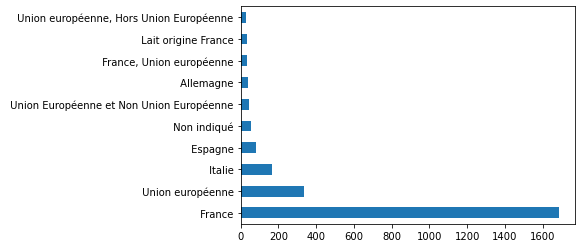

In [51]:
df['Origine'].value_counts().nlargest(10).plot(kind='barh')
plt.show()

C'est bien le cas. On ne peut donc pas tirer de conclusion sur l'origine des produits salés avec les données à notre disposition.

### Le Score des produits salés

In [59]:
top_sel = df[['Produit', 'Sel', 'Eco-Score', 'Nova', 'NutriScore']].sort_values('Sel', ascending = False).head(100)
salt_nova = top_sel['Nova'].mean()
salt_nutri = top_sel['NutriScore'].mode()
salt_eco = top_sel['Eco-Score'].mode()

print(f'NovaScore : {salt_nova} \n--------------\n NutriScore : {salt_nutri} \n--------------\n Eco-Score : {salt_eco}')

NovaScore : 3.4086021505376345 
--------------
 NutriScore : 0    D
dtype: object 
--------------
 Eco-Score : 0    A
dtype: object


On peut retrouver ci-dessus les scores des produits salés. On peut en conclure que les produits salés ont tendance à être d'une mauvaise qualité nutritionnelle et très transformés. Cependant, ils ont pour caractéristiques d'être souvent écologiques.

### La composition des produits salés

In [62]:
gass = df[['MatGrasse', 'AcideGras', 'Sucre', 'KCAL', 'KJ']]

In [75]:
#Création de sous ensemble salé / non salé
salé = df[(df['Sel'] > df['Sel'].mean()) & (df['MatGrasse'] < 30) & (df['AcideGras'] < 6) & (df['KCAL'] < 600) & (df['Sucre'] < 60)]
non_salé = df[(df['Sel'] < df['Sel'].mean()) & (df['MatGrasse'] < 30) & (df['AcideGras'] < 6) & (df['KCAL'] < 600) & (df['Sucre'] < 60)]

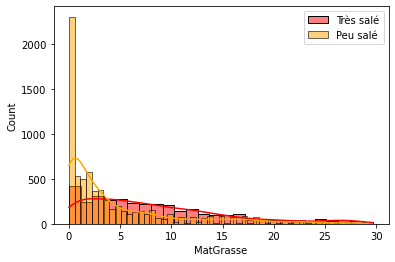

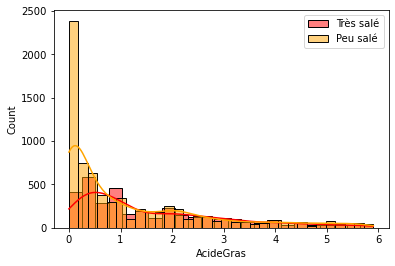

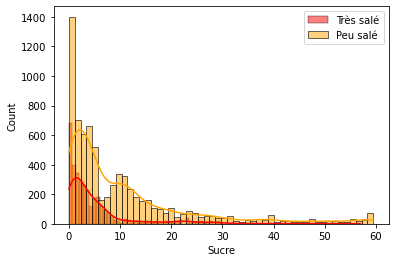

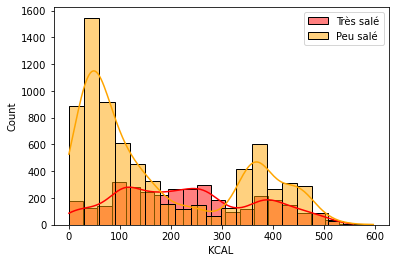

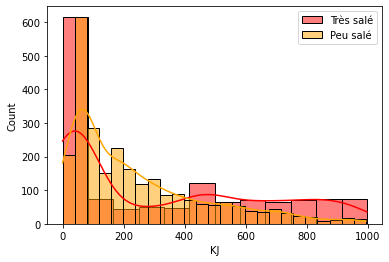

In [76]:
for col in gass:
    sns.histplot(data= salé[col], label = 'Très salé', kde = True, color = 'red')
    sns.histplot(data= non_salé[col], label = 'Peu salé', kde = True, color = 'orange')
    plt.legend()
    plt.show()

Ces graphiques nous montrent qu'il y a en réalité assez peu de différences entres les produits peu salés et les produits très salés. Voici les conclusions que l'on peut dégager :

- Les produits salés contiennent souvent un peu plus de matières grasse et d'acides gras (tendance existante mais faible)
- Ils sont de facto moins concentrés en sucre 
- Ils sont moins caloriques qu'une certaine catégories de produits peu salés (on pourrait ici approfondir la recherche, il s'agit probablement des produits les plus caloriques identifiés précedemment comme les gateaux chocolatés)
- Pas de différence significative de KJ

L’excès de sel peut avoir des conséquences néfastes sur la santé. Rétention d’eau, vieillissement de la peau, maladies cardiovasculaires, augmentation des risques de déclin cognitif, hypertension artérielle, risques d’œdèmes, insuffisance cardiaque ou rénale… Il faut donc être très prudent avec sa consommation sur le long terme. 